In [32]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [18]:
#read in csv's
census = pd.read_csv('census.csv')
txdata = pd.read_csv('TX_DEA_data.csv')
fips_tx = pd.read_csv("TX_fips.csv", header = None)

In [19]:
txdata = txdata.rename(columns={ "BUYER_COUNTY" : "County" })

txdata["County"] = txdata["County"].str.title()
txdata["County"] = txdata["County"] + (" County")
fips_tx.head()

,0,1,2,3,4
0,"Anderson County, Texas",48001,58084.0,18623.0,0.064217
1,"Andrews County, Texas",48003,16126.0,29363.0,0.046075
2,"Angelina County, Texas",48005,87433.0,21521.0,0.081342
3,"Aransas County, Texas",48007,23889.0,25906.0,0.092888
4,"Archer County, Texas",48009,8853.0,28250.0,0.045747


In [20]:
fips_tx = fips_tx.rename(columns={ 0 : "County", 1 : "fips", 2:'Population', 3:'Avg. Income', 4:'Poverty %'})
fips_tx["County"] = fips_tx["County"].str.split(pat = ",", n=1, expand=True)
fips_tx.head()

,County,fips,Population,Avg. Income,Poverty %
0,Anderson County,48001,58084.0,18623.0,0.064217
1,Andrews County,48003,16126.0,29363.0,0.046075
2,Angelina County,48005,87433.0,21521.0,0.081342
3,Aransas County,48007,23889.0,25906.0,0.092888
4,Archer County,48009,8853.0,28250.0,0.045747


In [21]:
merge_df = txdata.merge(fips_tx, how='left', on='County')
merge_df = merge_df.dropna()
merge_df.head()

,REPORTER_NAME,BUYER_NAME,BUYER_ADDRESS1,BUYER_STATE,County,BUYER_ZIP,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DRUG_NAME,QUANTITY,DOSAGE_UNIT,dos_str,fips,Population,Avg. Income,Poverty %
0,BELLCO DRUG CORP,LONGHORN DRUG CO,1711 S. HENDERSON BLVD.,TX,Gregg County,75662,1112006,1.5135,HYDROCODONE,1.0,500.0,5.0,48183.0,122736.0,24137.0,0.080066
1,BELLCO DRUG CORP,MALLEY'S PHARMACY,MALLEY JOE DAVID,TX,Jefferson County,77706,1042006,1.5135,HYDROCODONE,1.0,500.0,5.0,48245.0,252466.0,23563.0,0.085085
2,BELLCO DRUG CORP,MALLEY'S PHARMACY,MALLEY JOE DAVID,TX,Jefferson County,77706,11022006,2.4216,HYDROCODONE,4.0,400.0,10.0,48245.0,252466.0,23563.0,0.085085
3,BELLCO DRUG CORP,MALLEY'S PHARMACY,MALLEY JOE DAVID,TX,Jefferson County,77706,1042007,0.6054,HYDROCODONE,1.0,100.0,10.0,48245.0,252466.0,23563.0,0.085085
4,BELLCO DRUG CORP,MALLEY'S PHARMACY,MALLEY JOE DAVID,TX,Jefferson County,77706,2142007,0.6054,HYDROCODONE,1.0,100.0,10.0,48245.0,252466.0,23563.0,0.085085


In [28]:
quantity = merge_df.groupby("County")["QUANTITY"].sum()
income = merge_df.groupby("County")["Avg. Income"].mean()
pop = merge_df.groupby("County")["Population"].mean()
pov = merge_df.groupby("County")["Poverty %"].mean()


In [29]:
pop = pop.to_frame()
income = income.to_frame()
quantity = quantity.to_frame()
pov = pov.to_frame()

In [30]:
pmerge = pop.merge(income, how='left', on='County')
tmerge = pmerge.merge(pov, how='left', on='County')
qmerge = tmerge.merge(quantity, how='left', on='County')
qmerge['Per Cap. Quant.'] = qmerge['QUANTITY'] / qmerge['Population']
qmerge.reset_index()
qmerge.sort_values(by=['Per Cap. Quant.'], inplace=True, ascending=False)
qmerge.head()

,Population,Avg. Income,Poverty %,QUANTITY,Per Cap. Quant.
County,,,,,
Young County,18374.0,25859.0,0.075161,48525.0,2.640960
Stephens County,9485.0,21145.0,0.078651,24449.0,2.577649
Childress County,7066.0,20982.0,0.065384,18169.0,2.571327
Brown County,37903.0,20533.0,0.078543,91644.0,2.417856
Montague County,19568.0,26109.0,0.057850,43189.0,2.207124


In [25]:
#qmerge.describe()

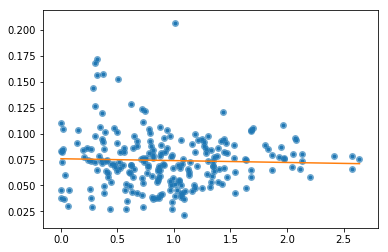

In [34]:
y = qmerge['Poverty %']
x = qmerge['Per Cap. Quant.']
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.scatter(x, y, alpha=0.5)
plt.show()